# What factors influence WORK LIFE BALANCE SCORE (WLB) of employees.

Multiple linear regression to be performed to find the answer.

## Import the neccessary libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

CSV format: fau_clinic_employee_wellbeing.csv

In [2]:
df = pd.read_csv("fau_clinic_employee_wellbeing.csv", sep = ',')

## Data cleaning

Check any missing values or null values.  

In [3]:
df.isnull().values.any()
df.isnull().sum()

DAILY_STRESS               0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
BMI_RANGE                  0
TODO_COMPLETED             0
DAILY_STEPS                0
SLEEP_HOURS                0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_HOBBY             0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

Result: No null values

## Dataset columns and unique values

Check columns and unique values for each.

In [4]:

for c in df.columns:
    array_unique_values = df[c].unique()
    print(c, array_unique_values)


DAILY_STRESS ['2' '3' '1' '4' '5' '0' '1/1/2000']
SOCIAL_NETWORK [ 5 10  7  4  3  1  2  8  6  9  0]
ACHIEVEMENT [ 2  5  3  4  0  1  6 10  8  7  9]
BMI_RANGE [1 2]
TODO_COMPLETED [ 6  5  2  3  8 10  7  4  1  0  9]
DAILY_STEPS [ 5  4  7  8  1  3  6  2 10  9]
SLEEP_HOURS [ 7  8  5  6 10  9  4  3  2  1]
SUFFICIENT_INCOME [1 2]
PERSONAL_AWARDS [ 4  3  5  8 10  1  2  7  6  0  9]
TIME_FOR_HOBBY [ 0  2  8  1  3  6  5  4 10  9  7]
WEEKLY_MEDITATION [ 5  6  3  0 10  2  1  7  4  8  9]
AGE ['36 to 50' '51 or more' '21 to 35' 'Less than 20']
GENDER ['Female' 'Male']
WORK_LIFE_BALANCE_SCORE [609.5 655.6 631.6 ... 651.7 611.5 790.5]


## Data transformations.

Remove incorrect data for column 

In [5]:
df = df[df['DAILY_STRESS'] != '1/1/2000']
print(df['DAILY_STRESS'].unique())
# print(df.columns)


['2' '3' '1' '4' '5' '0']


Turn string columns to numerical format.

In [6]:
# mapped to binary 0 and 1
df['GENDER_NUMERIC'] = df['GENDER'].map({'Female': 0, 'Male': 1})

# mapped at age midpoint
df['AGE_NUMERIC'] = df['AGE'].map({
    'Less than 20': 10,
    '21 to 35': 28,
    '36 to 50': 43,
    '51 or more': 55
})
df['DAILY_STRESS_INT'] = df['DAILY_STRESS'].map({
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5
})
print(df['GENDER_NUMERIC'].unique())
print(df['AGE_NUMERIC'].unique())
print(df['DAILY_STRESS_INT'].unique())
# df = df.drop(columns=['AGE', 'GENDER'], errors='ignore')

[0 1]
[43 55 28 10]
[2 3 1 4 5 0]


In [7]:
df = df.drop(columns=['AGE', 'GENDER', 'DAILY_STRESS'], errors='ignore')

'head' function: first 10 rows of the dataset to get some understanding of how it looks like.

In [8]:
df.head(10)

,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,GENDER_NUMERIC,AGE_NUMERIC,DAILY_STRESS_INT
0,5,2,1,6,5,7,1,4,0,5,609.5,0,43,2
1,10,5,2,5,5,8,2,3,2,6,655.6,0,43,3
2,10,3,2,2,4,8,2,4,8,3,631.6,0,43,3
3,7,2,2,3,5,5,1,5,2,0,622.7,0,55,3
4,4,2,2,5,5,7,2,8,1,5,663.9,0,55,1
5,10,2,1,6,7,8,2,10,8,3,722.3,0,55,2
6,10,3,2,8,7,7,2,10,8,10,727.2,1,55,2
7,7,4,1,8,8,6,2,8,2,2,676.2,0,28,4
8,3,5,1,10,1,10,2,10,3,10,702.8,0,28,3
9,10,0,2,3,3,6,1,3,8,1,634.4,0,55,4


"describe" function: count of raws, the mean, the standard deviation, min and max and so on. 

In [9]:
df.describe()

,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,GENDER_NUMERIC,AGE_NUMERIC,DAILY_STRESS_INT
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,6.474047,4.000689,1.410619,5.745977,5.703588,7.042953,1.728946,5.711289,3.326279,6.233611,666.750510,0.382756,36.052908,2.791685
std,3.086643,2.755912,0.491962,2.624179,2.891102,1.199053,0.444518,3.089540,2.729128,3.016479,45.021103,0.486075,13.870165,1.367801
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,480.000000,0.000000,10.000000,0.000000
25%,4.000000,2.000000,1.000000,4.000000,3.000000,6.000000,1.000000,3.000000,1.000000,4.000000,636.000000,0.000000,28.000000,2.000000
50%,6.000000,3.000000,1.000000,6.000000,5.000000,7.000000,2.000000,5.000000,3.000000,7.000000,667.700000,0.000000,43.000000,3.000000
75%,10.000000,6.000000,2.000000,8.000000,8.000000,8.000000,2.000000,9.000000,5.000000,10.000000,698.500000,1.000000,43.000000,4.000000
max,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000,1.000000,55.000000,5.000000


I would say that columns like 'bmi_range' is irrelevant to this analysis. It may impact the individual, but I think the direct relationship with WLB might be weaker compared to other variables. For that reason I will drop this column.

In [10]:
df = df.drop(columns=['BMI_RANGE'], errors='ignore')

In [11]:
print(df.head(3))

   SOCIAL_NETWORK  ACHIEVEMENT  TODO_COMPLETED  DAILY_STEPS  SLEEP_HOURS  \
0               5            2               6            5            7   
1              10            5               5            5            8   
2              10            3               2            4            8   

   SUFFICIENT_INCOME  PERSONAL_AWARDS  TIME_FOR_HOBBY  WEEKLY_MEDITATION  \
0                  1                4               0                  5   
1                  2                3               2                  6   
2                  2                4               8                  3   

   WORK_LIFE_BALANCE_SCORE  GENDER_NUMERIC  AGE_NUMERIC  DAILY_STRESS_INT  
0                    609.5               0           43                 2  
1                    655.6               0           43                 3  
2                    631.6               0           43                 3  


## PLOTS

1. Daily Stress for female/male employee.

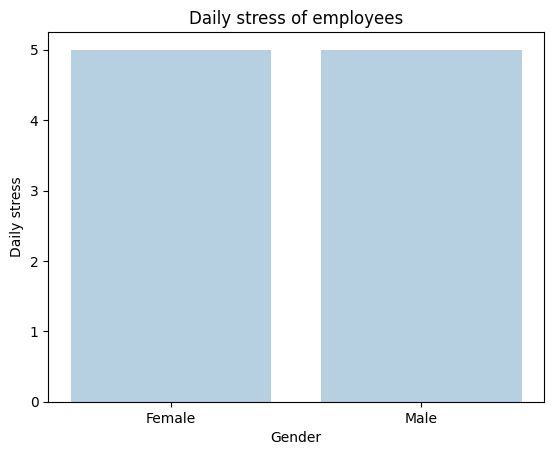

In [12]:
df['GENDER_LABEL'] = df['GENDER_NUMERIC'].map({0: 'Female', 1: 'Male'})

plt.bar(df['GENDER_LABEL'], df['DAILY_STRESS_INT'], color=['#B6D0E2'])
plt.ylabel('Daily stress')
plt.xlabel('Gender')
plt.title('Daily stress of employees')
plt.show()

GENDER_LABEL has repeated categories: multiple rows labeled "Male" and "Female" and each bar is plotted on top of the previous one at the same x-axis position.
As a result, only the last bar remains visible for each category.

With this plot, it looked like it was the same value for female and male. This is why I am choosing an aggregated mean to show the difference between genders.

1. AVG daily stress for female/male employee.

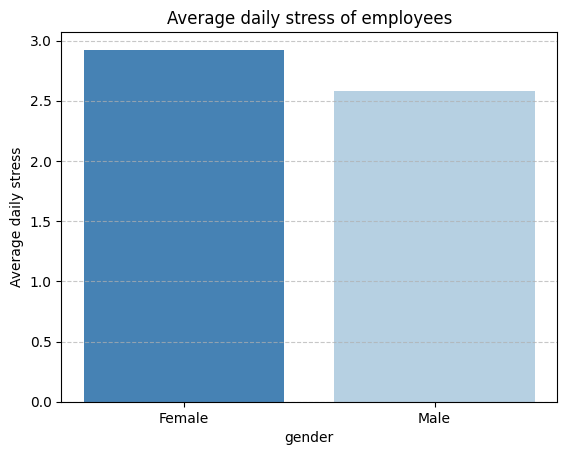

In [13]:

df['GENDER_LABEL'] = df['GENDER_NUMERIC'].map({0: 'Female', 1: 'Male'})

stress_by_gender = df.groupby('GENDER_LABEL')['DAILY_STRESS_INT'].mean()

plt.bar(stress_by_gender.index, stress_by_gender, color=['#4682B4', '#B6D0E2'])
plt.ylabel('Average daily stress')
plt.xlabel('gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average daily stress of employees')
plt.show()

3. Genders and hobby time.

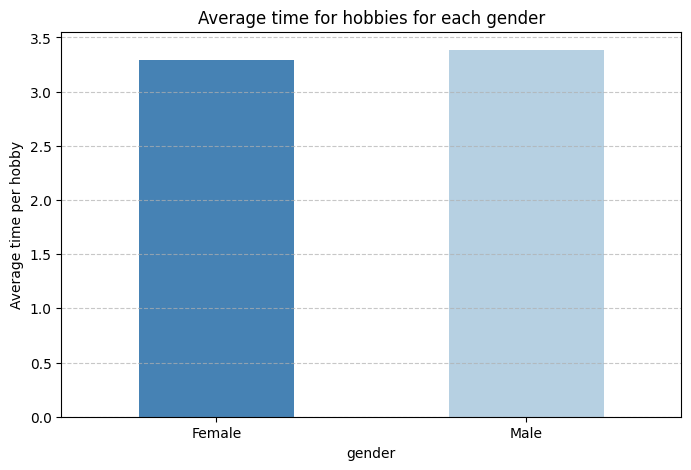

In [14]:

df['GENDER_LABEL'] = df['GENDER_NUMERIC'].map({0: 'Female', 1: 'Male'})
time_by_gender = df.groupby('GENDER_LABEL')['TIME_FOR_HOBBY'].mean()

plt.figure(figsize=(8, 5))
time_by_gender.plot(kind='bar', color=['#4682B4', '#B6D0E2'], title='Average time for hobbies for each gender')
plt.ylabel('Average time per hobby')
plt.xlabel('gender')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
df = df.drop(columns=['AGE_CATEGORY', 'GENDER_LABEL'], errors='ignore')

A correlation matrix to determine the attributes to which WLB score is highly correlated to. 

Correlation with WLB score:
WORK_LIFE_BALANCE_SCORE    1.000000
ACHIEVEMENT                0.561241
TODO_COMPLETED             0.545503
TIME_FOR_HOBBY             0.516979
PERSONAL_AWARDS            0.504225
DAILY_STEPS                0.422981
WEEKLY_MEDITATION          0.416229
SOCIAL_NETWORK             0.412580
SUFFICIENT_INCOME          0.403554
SLEEP_HOURS                0.196420
AGE_NUMERIC                0.112786
GENDER_NUMERIC            -0.039911
DAILY_STRESS_INT          -0.365399
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64


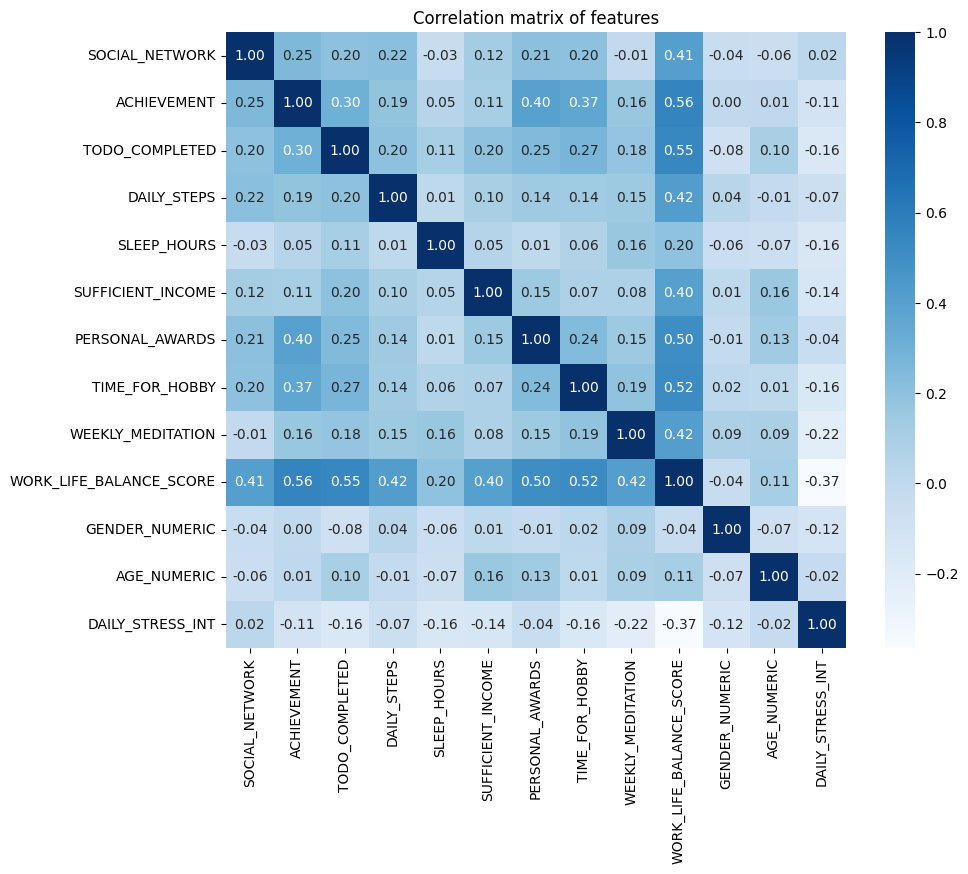

In [16]:
correlation_matrix = df.corr()
print("Correlation with WLB score:")
print(correlation_matrix['WORK_LIFE_BALANCE_SCORE'].sort_values(ascending=False))

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='Blues',cbar=True)
plt.title('Correlation matrix of features')
plt.show()
